In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader

from binarypredictor import split_functions
from binarypredictor.dataset import FunctionPairDataset, FunctionPairSplitDataset
from binarypredictor.net import DerivativeNet, TangentNet

In [2]:
out_features = 250
in_features = out_features

In [3]:
net_0 = DerivativeNet(train=False, net='FirstDerivativeNet_250_s.pth')
net_1 = DerivativeNet(train=False, net='SecondDerivativeNet_250_s.pth')

In [4]:
fpd = FunctionPairSplitDataset(n_functions=5, filename="test__.csv", overwrite=True, step=1/in_features)
fpd.create_functions()

In [5]:
for f in fpd:
    print(f)
    break

(tensor([[-7.1809e-01, -1.7907e-09],
        [-7.2016e-01, -3.2357e-04],
        [-7.1637e-01,  5.1444e-03],
        [-7.1046e-01,  1.2670e-02],
        [-7.0323e-01,  2.1459e-02],
        [-6.9504e-01,  3.1135e-02],
        [-6.8612e-01,  4.1476e-02],
        [-6.7663e-01,  5.2335e-02],
        [-6.6665e-01,  6.3608e-02],
        [-6.5627e-01,  7.5217e-02],
        [-6.4556e-01,  8.7102e-02],
        [-6.3455e-01,  9.9215e-02],
        [-6.2329e-01,  1.1152e-01],
        [-6.1181e-01,  1.2397e-01],
        [-6.0014e-01,  1.3655e-01],
        [-5.8830e-01,  1.4924e-01],
        [-5.7632e-01,  1.6201e-01],
        [-5.6421e-01,  1.7485e-01],
        [-5.5198e-01,  1.8773e-01],
        [-5.3965e-01,  0.0000e+00],
        [-5.2724e-01,  0.0000e+00],
        [-5.1475e-01,  0.0000e+00],
        [-5.0220e-01,  0.0000e+00],
        [-4.8959e-01,  0.0000e+00],
        [-4.7693e-01,  0.0000e+00],
        [-4.6424e-01,  0.0000e+00],
        [-4.5151e-01,  0.0000e+00],
        [ 0.0000e+00,  0.00

In [6]:
x = torch.arange(1e-10, 1., step=fpd.step)

In [7]:
d = fpd[0]
print(d[1])
scale = d[2].unsqueeze(-1)
inp = torch.hstack((d[0][:, 0], d[0][:, 1]))

[{'o': 0, 'T': 886.3360184321189, 'tm1': 338.9622424704507, 'tm2': 2938.231623932052, 'tm': 1638.5969332012514, 'a': 34058.237256588014, 's1': 8.937288795060992, 's2': 2.7802095798614754}, {'o': 0, 'T': 886.3360184321189, 'tm1': 338.9622424704507, 'tm2': 2938.231623932052, 'tm': 1638.5969332012514, 'a': 47681.532159223214, 's1': 0, 's2': 0}]


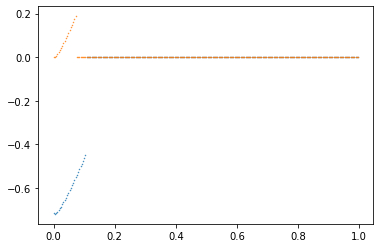

In [11]:
plt.scatter(x, d[0][:, 0], s=0.2)
plt.scatter(x, d[0][:, 1], s=0.2)
plt.show()